### NAMA: SUKMA GLADYS V
### NIM: 2141720179
### NO ABSEN: 27
### KELAS: TI-3E

**NOMOR 1**
---
Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [ ]:
# unduh dataset MNIST
from sklearn.datasets import fetch_openml
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#Memastikan Jumlah Data Pada Setiap Label
import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Menghitung jumlah data per kelas pada dataset pelatihan
class_counts = [0] * 10
for label in train_labels:
    class_counts[label] += 1

# Menampilkan jumlah data per kelas
for i, count in enumerate(class_counts):
    print(f"Kelas {i}: {count} contoh")

Kelas 0: 5923 contoh
Kelas 1: 6742 contoh
Kelas 2: 5958 contoh
Kelas 3: 6131 contoh
Kelas 4: 5842 contoh
Kelas 5: 5421 contoh
Kelas 6: 5918 contoh
Kelas 7: 6265 contoh
Kelas 8: 5851 contoh
Kelas 9: 5949 contoh


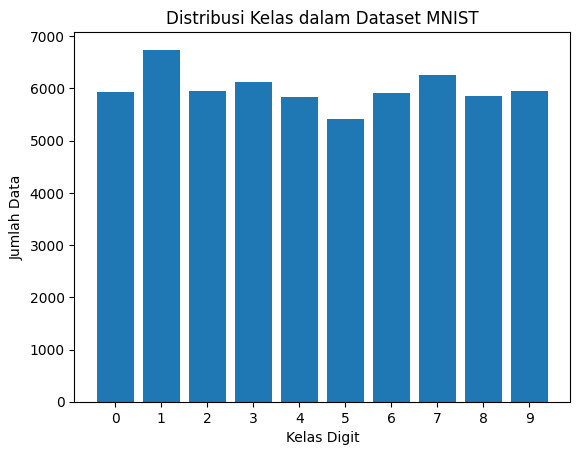

In [ ]:
#Mengecek Keseimbangan Data
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel('Kelas Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Kelas dalam Dataset MNIST')
plt.show()

In [ ]:
# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(_, train_labels), (_, _) = mnist.load_data()

# Menghitung jumlah data per kelas
class_counts = [0] * 10
for label in train_labels:
    class_counts[label] += 1

# Menghitung rasio kelas
ratio = max(class_counts) / min(class_counts)

# Menampilkan rasio
print(f"Rasio kelas: {ratio:.2f}")

Rasio kelas: 1.24


**Dataset MNIST menunjukkan bahwa hasil rasio kelas yang didapat adalah 1,24. Dataset tersebut dianggap seimbang karena rasio yang mendekati 1 akan dianggap seimbang.**

**NOMOR 2**
---
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.

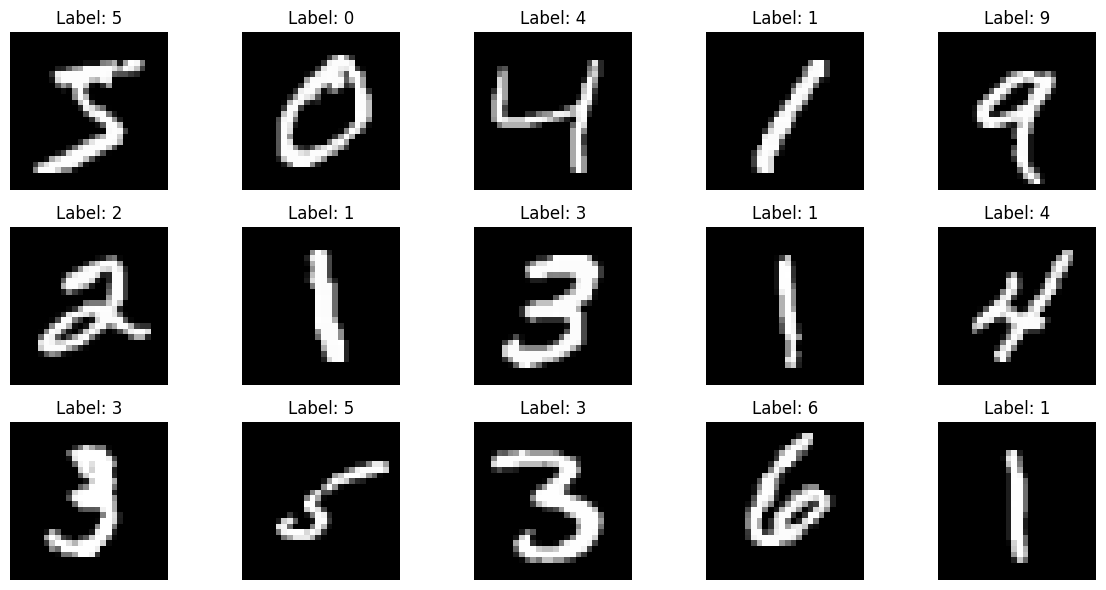

In [ ]:
# Menampilkan 15 citra pertama dari dataset MNIST berserta labelnya
plt.figure(figsize=(12, 6)) #Mengatur ukuran gambar

#Membuat loop untuk 15 iterasi
for i in range(15):
    plt.subplot(3, 5, i + 1) # setiap iterasi, membuat subplot dalam grid 3x5
    plt.imshow(train_images[i], cmap='gray') #Menampilkan citra ke-i dari dataset MNIST dalam skala abu-abu
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Kode program diatas menampilkan 15 citra pertama dari dataset MNIST serta labelnya dalam bentuk subplot grid 3x5. Setiap citra ditampilkan dalam skala grayscale dengan label yang sesuai untuk memberikan visualisasi awal tentang isi dataset yang berisi tulisan tangan digit angka 0 sampai 9

**NOMOR 3**
---
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

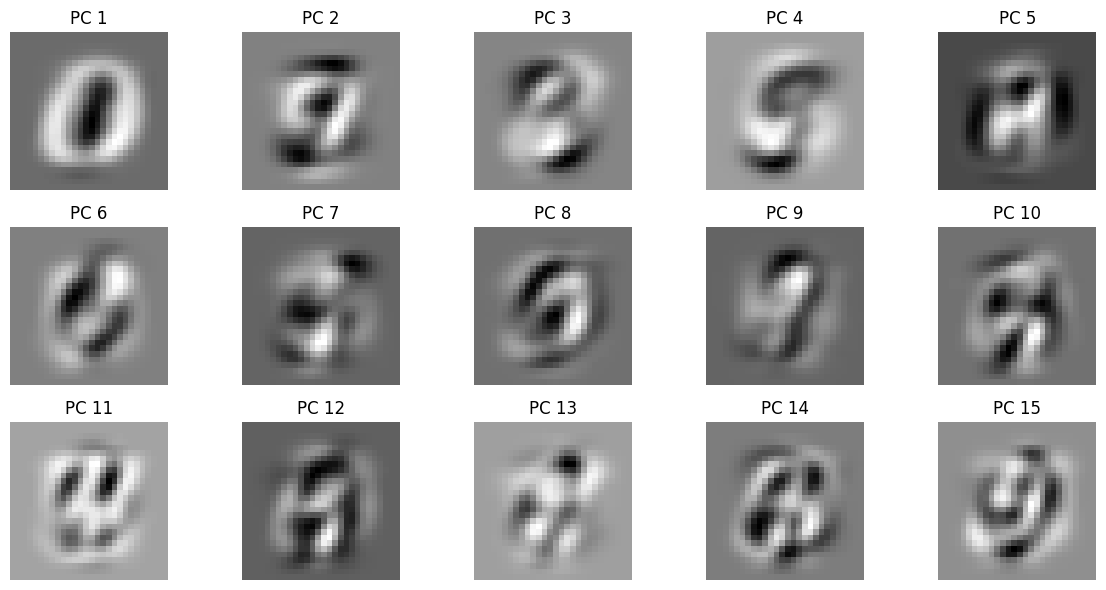

In [ ]:
#Ekstraksi Fitur dengan Metode PCA
from sklearn.decomposition import PCA

# Meratakan citra menjadi vektor
num_samples, height, width = train_images.shape
train_images_flat = train_images.reshape(num_samples, height * width)

# Normalisasi
train_images_flat_normalized = train_images_flat / 255.0

# Ekstraksi fitur menggunakan PCA
n_components = 100  # Jumlah komponen utama yang ingin diekstraksi
pca = PCA(n_components=n_components)
train_features = pca.fit_transform(train_images_flat_normalized)

# Menampilkan contoh fitur
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(height, width), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

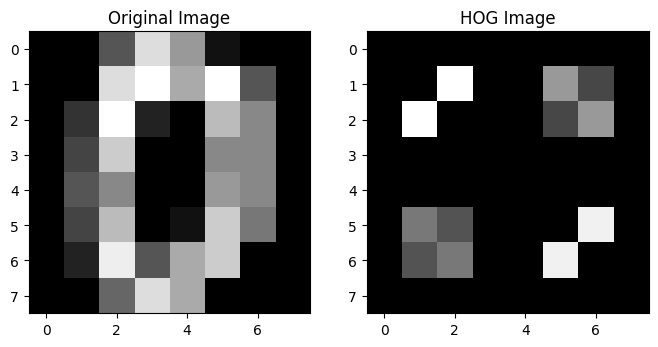

In [ ]:
#Ekstraksi Fitur dengan Metode HOG
from skimage.feature import hog
from skimage import io, color
from sklearn import datasets
import numpy as np
import pandas as pd

# Load dataset MNIST
digits = datasets.load_digits()

# Select a specific image
image = digits.images[0]

# Extract HOG features
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

# Plot original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Plot HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')

plt.show()

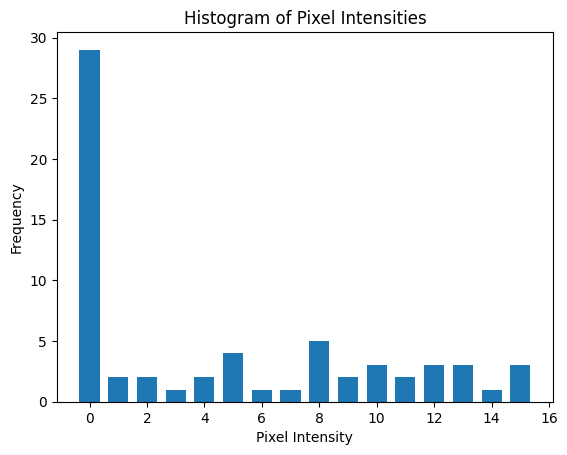

In [ ]:
# Ekstraksi Fitur dengan Metode Histogram
# Load dataset MNIST
digits = datasets.load_digits()

# Select a specific image
image = digits.images[0]

# Flatten the image into a 1D array
flattened_image = image.flatten()

# Compute the histogram of pixel intensities
histogram, bins = np.histogram(flattened_image, bins=16, range=(0, 16))

# Plot the histogram
plt.bar(bins[:-1], histogram, width=0.7, align='center')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

**NOMOR 4**
---
Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Memuat dataset MNIST
mnist = fetch_openml('mnist_784')

# Memisahkan fitur (X) dan label (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Memisahkan data menjadi training dan testing dengan rasio 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=42)

# Memisahkan data menjadi training dan testing dengan rasio 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=42)

# Memisahkan data menjadi training dan testing dengan rasio 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.10, random_state=42)

# Menampilkan ukuran dari setiap data train dan test
print("Data Training 70:30:", X_train_70.shape, y_train_70.shape, X_test_30.shape, y_test_30.shape)
print("Data Training 80:20:", X_train_80.shape, y_train_80.shape, X_test_20.shape, y_test_20.shape)
print("Data Training 90:10:", X_train_90.shape, y_train_90.shape, X_test_10.shape, y_test_10.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data Training 70:30: (49000, 784) (49000,) (21000, 784) (21000,)
Data Training 80:20: (56000, 784) (56000,) (14000, 784) (14000,)
Data Training 90:10: (63000, 784) (63000,) (7000, 784) (7000,)


**NOMOR 5**
---
Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

**Naive Bayes**
---
Rasio 70:30

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_70, y_train_70)

# Melakukan prediksi pada data pengujian
y_pred_nb = nb_classifier.predict(X_test_30)

Rasio 80:20

In [ ]:
# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_80, y_train_80)

# Melakukan prediksi pada data pengujian
y_pred_nb_80 = nb_classifier.predict(X_test_20)

Rasio 90:10

In [ ]:
# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb_classifier.fit(X_train_90, y_train_90)

# Melakukan prediksi pada data pengujian
y_pred_nb_90 = nb_classifier.predict(X_test_10)

**SVM**
---
Rasio 70:30

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()

# Melatih model SVM pada data pelatihan
svm_classifier.fit(X_train_70, y_train_70)

# Melakukan prediksi pada data pengujian
y_pred_svm_70 = svm_classifier.predict(X_test_30)

Rasio 80:20

In [ ]:
svm_classifier = SVC()

# Melatih model SVM pada data pelatihan
svm_classifier.fit(X_train_80, y_train_80)

# Melakukan prediksi pada data pengujian
y_pred_svm_80 = svm_classifier.predict(X_test_20)

Rasio 90:10

In [ ]:
svm_classifier = SVC()

# Melatih model SVM pada data pelatihan
svm_classifier.fit(X_train_90, y_train_90)

# Melakukan prediksi pada data pengujian
y_pred_svm_90 = svm_classifier.predict(X_test_10)

**NOMOR 6**
---
Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

**Naive Bayes**

In [ ]:
# Evaluasi Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model Naive Bayes dengan rasio 70:30
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 70:30")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_30, y_pred_nb)}")
print(f"Classification report data testing:\n{classification_report(y_test_30, y_pred_nb)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_30, y_pred_nb)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 80:20
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 80:20")
print(f"Akurasi data training: {accuracy_score(y_train_80, y_train_80)}")
print(f"Akurasi data testing: {accuracy_score(y_test_20, y_pred_nb_80)}")
print(f"Classification report data testing:\n{classification_report(y_test_20, y_pred_nb_80)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_20, y_pred_nb_80)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 90:10
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 90:10")
print(f"Akurasi data training: {accuracy_score(y_train_90, y_train_90)}")
print(f"Akurasi data testing: {accuracy_score(y_test_10, y_pred_nb_90)}")
print(f"Classification report data testing:\n{classification_report(y_test_10, y_pred_nb_90)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_10, y_pred_nb_90)}")

Evaluasi Naive Bayes
Evaluasi Naive Bayes dengan rasio 70:30
Akurasi data training: 1.0
Akurasi data testing: 0.8257142857142857
Classification report data testing:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000

Confusion matrix data testing:
[[1857    1   12    6    4   33   40    1  10

**SVM**

In [ ]:
# Evaluasi SVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Evaluasi SVM")
print("Evaluasi SVM dengan rasio 70:30")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_30, y_pred_svm_70)}")
print(f"Classification report data testing:\n{classification_report(y_test_30, y_pred_svm_70)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_30, y_pred_svm_70)}")
print("\n\n")

print("Evaluasi SVM")
print("Evaluasi SVM dengan rasio 80:20")
print(f"Akurasi data training: {accuracy_score(y_train_80, y_train_80)}")
print(f"Akurasi data testing: {accuracy_score(y_test_20, y_pred_svm_80)}")
print(f"Classification report data testing:\n{classification_report(y_test_20, y_pred_svm_80)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_20, y_pred_svm_80)}")
print("\n\n")

print("Evaluasi SVM")
print("Evaluasi SVM dengan rasio 90:10")
print(f"Akurasi data training: {accuracy_score(y_train_90, y_train_90)}")
print(f"Akurasi data testing: {accuracy_score(y_test_10, y_pred_svm_90)}")
print(f"Classification report data testing:\n{classification_report(y_test_10, y_pred_svm_90)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_10, y_pred_svm_90)}")

Evaluasi SVM
Evaluasi SVM dengan rasio 70:30
Akurasi data training: 1.0
Akurasi data testing: 0.9762857142857143
Classification report data testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.97      0.97      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.99      2088
           7       0.97      0.97      0.97      2248
           8       0.98      0.96      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

Confusion matrix data testing:
[[2035    1    3    0    1    4    8    2    4    0]
 [   0 2

**NOMOR 7**
---
Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

**Naive Bayes**
---
Rasio 70:30

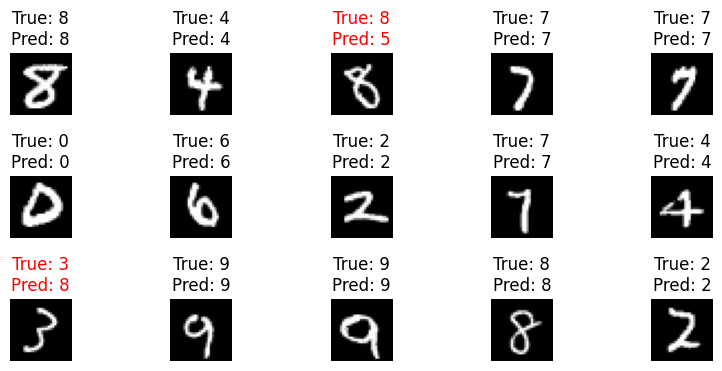

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_nb.iloc[i] if isinstance(y_pred_nb, pd.Series) else y_pred_nb[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

Rasio 80:20

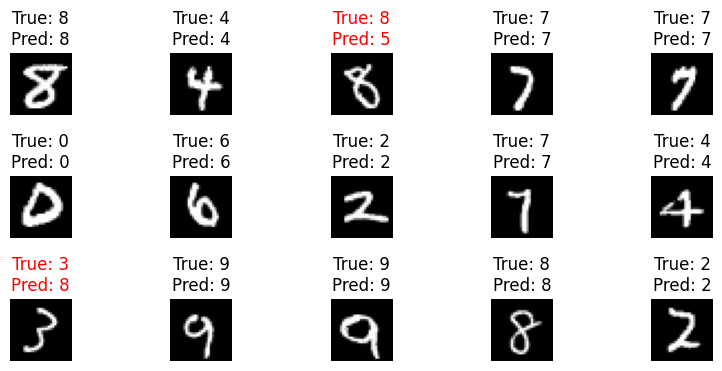

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_nb_80.iloc[i] if isinstance(y_pred_nb_80, pd.Series) else y_pred_nb_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

Rasio 90:10

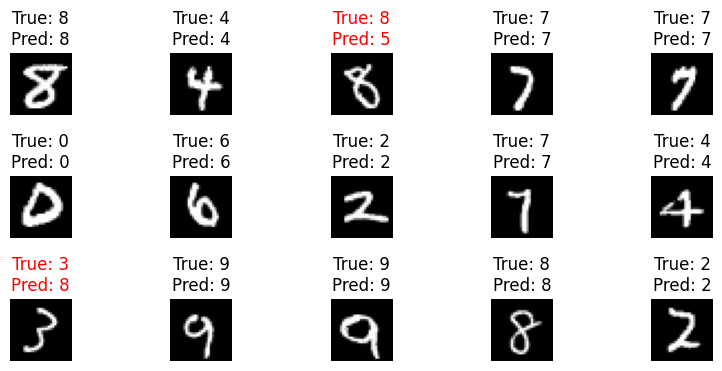

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_nb_90.iloc[i] if isinstance(y_pred_nb_90, pd.Series) else y_pred_nb_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**SVM**
---
Rasio 70:30

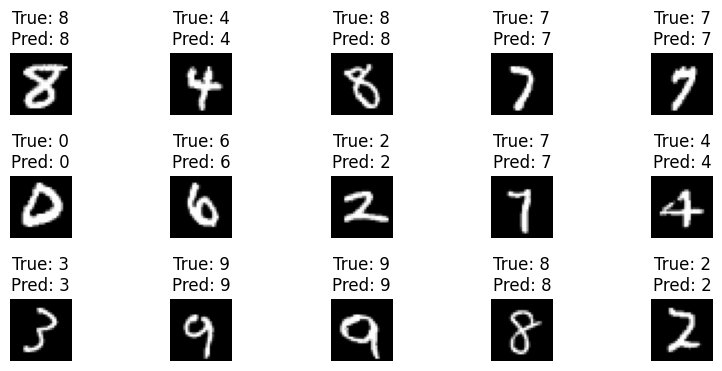

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_svm_70.iloc[i] if isinstance(y_pred_svm_70, pd.Series) else y_pred_svm_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

Rasio 80:20

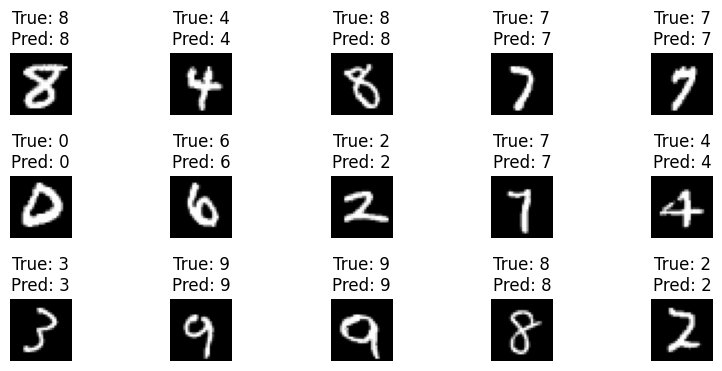

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_svm_80.iloc[i] if isinstance(y_pred_svm_80, pd.Series) else y_pred_svm_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

Rasio 90:10

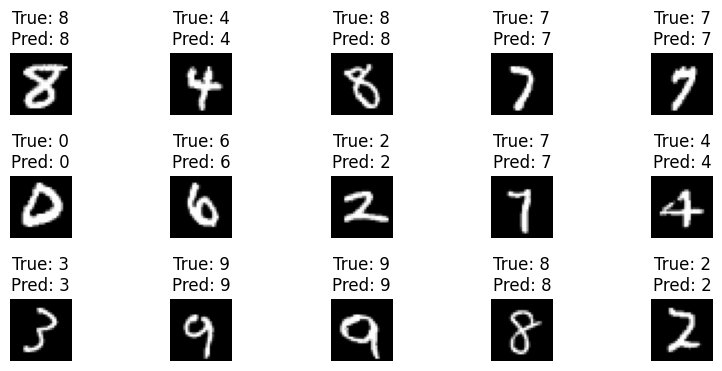

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.values.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_svm_90.iloc[i] if isinstance(y_pred_svm_90, pd.Series) else y_pred_svm_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**NOMOR 8**
---
**Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi
yang didapatkan? Jelaskan!**

Jawaban:

Model Terbaik:
Model SVM (Support Vector Machine) dengan kernel linear menghasilkan tingkat akurasi yang lebih tinggi dibandingkan dengan model Naive Bayes pada data MNIST.
Konfigurasi Model Terbaik (SVM):
Model terbaik yaitu dengan menggunakan Support Vector Machine (SVM).

Konfigurasinya yaitu menggunakan kernel RBF (Radial Basis Function) untuk SVM dan mengatur seed (random_state).

Tingkat akurasi : dengan mencoba dan mencapai tingkat akurasi sebesar 98% saat menggunakan rasio data pelatihan dan pengujian 80:20
